In [13]:
import pandas as pd
import numpy as np

In [2]:
#the close price for each stock from 2014 to 2018
df = pd.read_csv('stock_price_list.csv',delimiter='\t')

In [14]:
import matplotlib.pyplot as plt
from matplotlib import dates, ticker, style
import matplotlib as mpl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [3]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df=df.set_index('Date')

In [4]:
df.head()

,AAPL,AMFE,ASNT,AVEO,BOXL,CEI,COOP,CRMD,CSRH,CTL,...,NVDA,OACQ,ORC,RIBT,RNWR,ROX,SYCRF,TPL,VCSY,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,79.018570,0.0095,NaN,1.80,NaN,612.50,34.439999,1.36,0.009,31.65,...,15.860000,NaN,13.23,5.19,NaN,0.71,0.73,99.500000,0.0609,197.940002
2014-01-03,77.282860,0.0090,NaN,1.85,NaN,612.50,35.280003,1.49,0.009,31.60,...,15.670000,NaN,13.39,5.48,NaN,0.78,0.77,99.500000,0.0650,196.000000
2014-01-06,77.704285,0.0090,NaN,1.80,NaN,618.75,33.000000,1.46,0.009,31.67,...,15.880000,NaN,13.42,5.34,NaN,0.76,0.75,99.570000,0.0640,195.860001
2014-01-07,77.148575,0.0090,NaN,1.78,NaN,618.75,32.280003,1.50,0.009,31.41,...,16.139999,NaN,13.23,5.66,NaN,0.77,0.85,98.650002,0.0630,201.509995
2014-01-08,77.637146,0.0095,NaN,1.78,NaN,625.00,32.160000,1.60,0.009,31.24,...,16.360001,NaN,13.38,5.59,NaN,0.81,0.85,98.449997,0.0600,205.289993


In [5]:
##compute the APR for each stock
# There are 252 trading days in a year; the 100 converts to percentages
stock_apr = stock_change * 252 * 100    
stock_apr.head()

NameError: name 'stock_change' is not defined

Text(0.5,1,'time series plot')

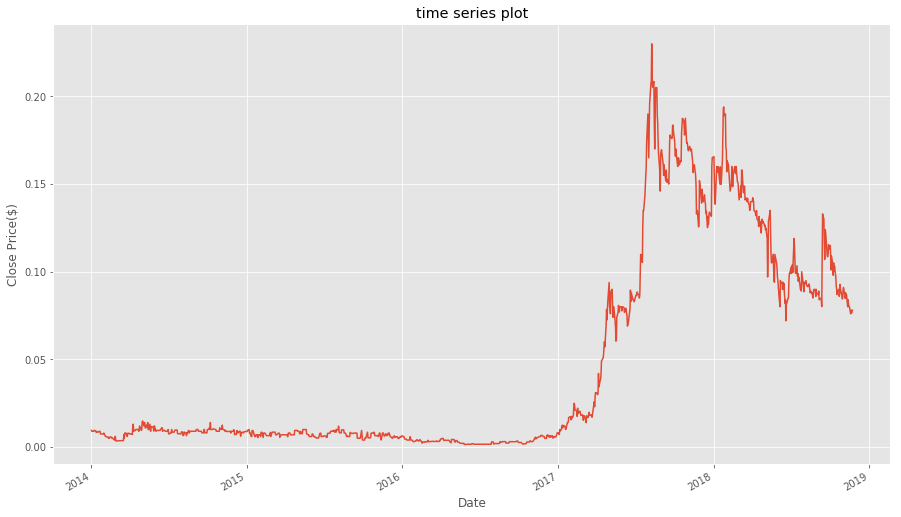

In [43]:
##time series plot for AMFE
##used to predict the trend of the stock price
from matplotlib import pylab
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 9)
df['AMFE'].plot(grid = True) 
plt.xlabel('Date')  
plt.ylabel('Close Price($)')  
plt.title('time series plot')

In [45]:
# #stock price with different scales in one graph
# %matplotlib inline
# pylab.rcParams['figure.figsize'] = (15, 9)
# df1.plot(secondary_y = ['AMFE'], grid = True) 
# plt.xlabel('Date')  
# plt.ylabel('Close Price')  
# plt.title('Comparation of Price Change in Different Scales')

Text(0.5,1,'Price change over time')

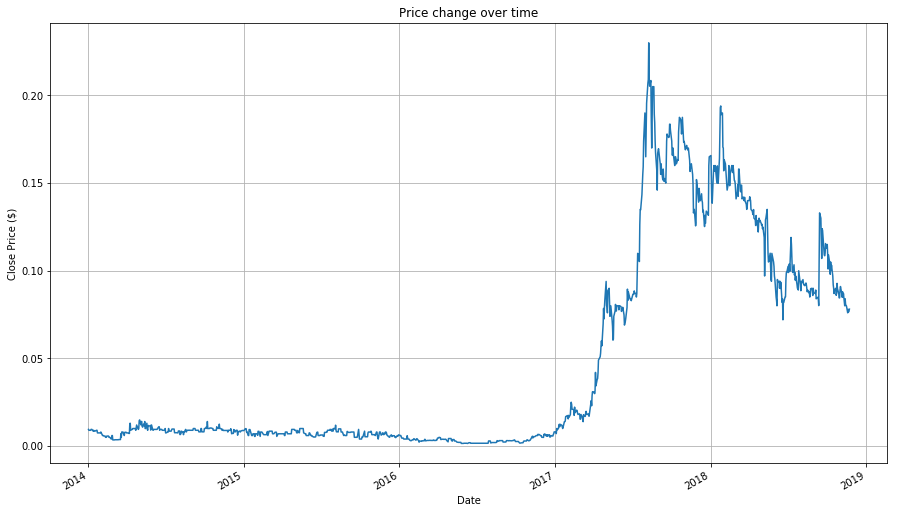

In [18]:
#stock price change for all stocks
df['AMFE'].plot(grid = True)
plt.xlabel('Date')  
plt.ylabel('Close Price ($)')  
plt.title('Price change over time')

In [46]:
#stock’s return since the beginning of the period of interest
#return(t) = price(t)-price(0)
stock_return = df.apply(lambda x: x / x[0])
stock_return.head() - 1


,AAPL,AMFE,ASNT,AVEO,BOXL,CEI,COOP,CRMD,CSRH,CTL,...,NVDA,OACQ,ORC,RIBT,RNWR,ROX,SYCRF,TPL,VCSY,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-03,-0.021966,-0.052632,NaN,0.027778,NaN,0.000000,0.024390,0.095588,0.0,-0.001580,...,-0.011980,NaN,0.012094,0.055877,NaN,0.098592,0.054794,0.000000,0.067323,-0.009801
2014-01-06,-0.016633,-0.052632,NaN,0.000000,NaN,0.010204,-0.041812,0.073529,0.0,0.000632,...,0.001261,NaN,0.014361,0.028902,NaN,0.070423,0.027397,0.000704,0.050903,-0.010508
2014-01-07,-0.023665,-0.052632,NaN,-0.011111,NaN,0.010204,-0.062718,0.102941,0.0,-0.007583,...,0.017654,NaN,0.000000,0.090559,NaN,0.084507,0.164384,-0.008543,0.034483,0.018036
2014-01-08,-0.017482,0.000000,NaN,-0.011111,NaN,0.020408,-0.066202,0.176471,0.0,-0.012954,...,0.031526,NaN,0.011338,0.077071,NaN,0.140845,0.164384,-0.010553,-0.014778,0.037132


Text(0.5,1,'Return of Stocks')

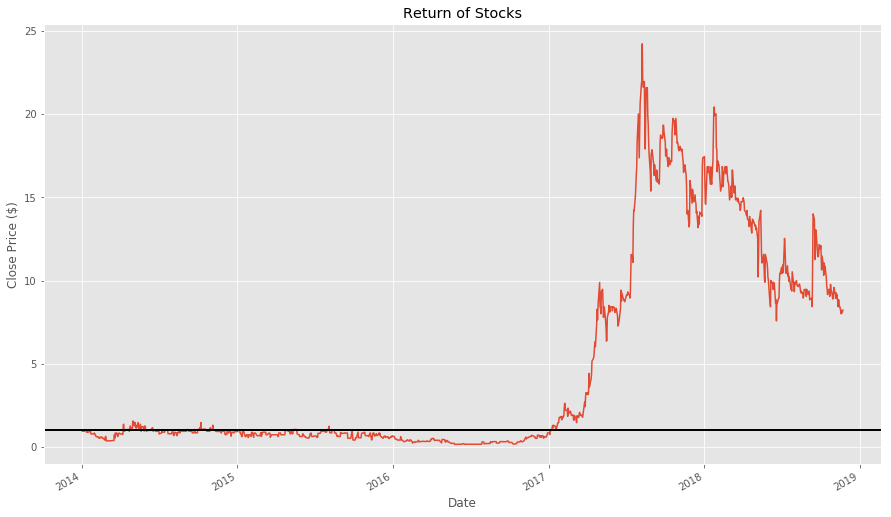

In [47]:
#plot return of stocks
stock_return['AMFE'].plot(grid = True).axhline(y = 1, 
                                       color = "black", 
                                       lw = 2)
plt.xlabel('Date')  
plt.ylabel('Close Price ($)')  
plt.title('Return of Stocks')

In [21]:
#log differences of the price of stocks
#In thelong run, use log difference of stock close price to predict rate of return
#change(t)=log(price(t))-log(price(t-1))
stock_rt = df.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_rt.head()

,AAPL,AMFE,ASNT,AVEO,BOXL,CEI,COOP,CRMD,CSRH,CTL,...,NVDA,OACQ,ORC,RIBT,RNWR,ROX,SYCRF,TPL,VCSY,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.022211,-0.054067,NaN,0.027399,NaN,0.000000,0.024098,0.091291,0.0,-0.001581,...,-0.012052,NaN,0.012021,0.054371,NaN,0.094029,0.053346,0.000000,0.065154,-0.009849
2014-01-06,0.005438,0.000000,NaN,-0.027399,NaN,0.010152,-0.066809,-0.020340,0.0,0.002213,...,0.013312,NaN,0.002238,-0.025879,NaN,-0.025975,-0.026317,0.000703,-0.015504,-0.000715
2014-01-07,-0.007177,0.000000,NaN,-0.011173,NaN,0.000000,-0.022060,0.027029,0.0,-0.008244,...,0.016240,NaN,-0.014259,0.058198,NaN,0.013072,0.125163,-0.009283,-0.015748,0.028439
2014-01-08,0.006313,0.054067,NaN,0.000000,NaN,0.010050,-0.003724,0.064539,0.0,-0.005427,...,0.013539,NaN,0.011274,-0.012445,NaN,0.050644,0.000000,-0.002029,-0.048790,0.018585


Text(0.5,1,'Long Run Rate of Return')

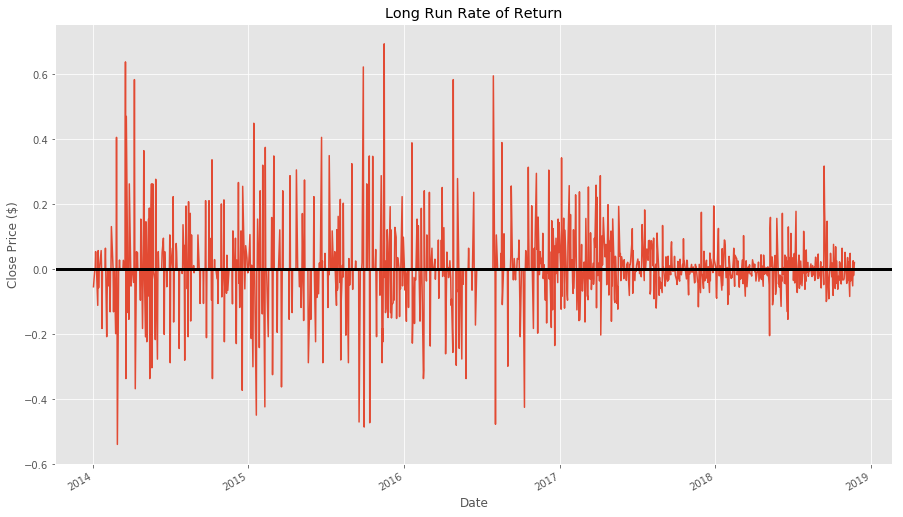

In [49]:
#plot rate of return
stock_rt['AMFE'].plot(grid = True).axhline(y = 0, 
                                   color = "black", 
                                   lw = 3)
plt.xlabel('Date')  
plt.ylabel('Close Price ($)')  
plt.title('Long Run Rate of Return')

In [24]:
# #1 day percent change of stock price
# df2=df.pct_change()
# df2.head()

In [56]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf
start = datetime.datetime(2014,1,2)
end = datetime.datetime(2018,11,23)
all_df = web.DataReader(['AAPL', 'AMFE','AVEO','CEI','COOP','CRMD','CSRH','CTL','CVM','CVS','DDDX','FB','FNHI','FTNW','GGII','GLTC','HMNY','JE','MDT','MSMY','NULGF'],'yahoo', start,end)
a_df = web.DataReader('AAPL','yahoo', start,end)
b_df = web.DataReader('AMFE','yahoo', start,end)

In [57]:

b_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,0.0095,0.0095,0.0095,0.0095,180000,0.0095
2014-01-03,0.0095,0.0090,0.0090,0.0090,209500,0.0090
2014-01-06,0.0090,0.0090,0.0090,0.0090,0,0.0090
2014-01-07,0.0090,0.0090,0.0090,0.0090,20000,0.0090
2014-01-08,0.0095,0.0095,0.0095,0.0095,20000,0.0095


In [107]:
#histograph

In [136]:
!pip install mpl_finance

  Running setup.py bdist_wheel for mpl-finance ... done
  Stored in directory: /Users/yuxiguo/Library/Caches/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance


In [58]:
#resample data into a new data with 10 days as a unit
style.use('ggplot')
df_ohlc=b_df['Adj Close'].resample('10D').ohlc()
df_volume = b_df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_volume.head()

Date
2014-01-02    429500
2014-01-12    326500
2014-01-22    271740
2014-02-01    443500
2014-02-11    201000
Name: Volume, dtype: int64

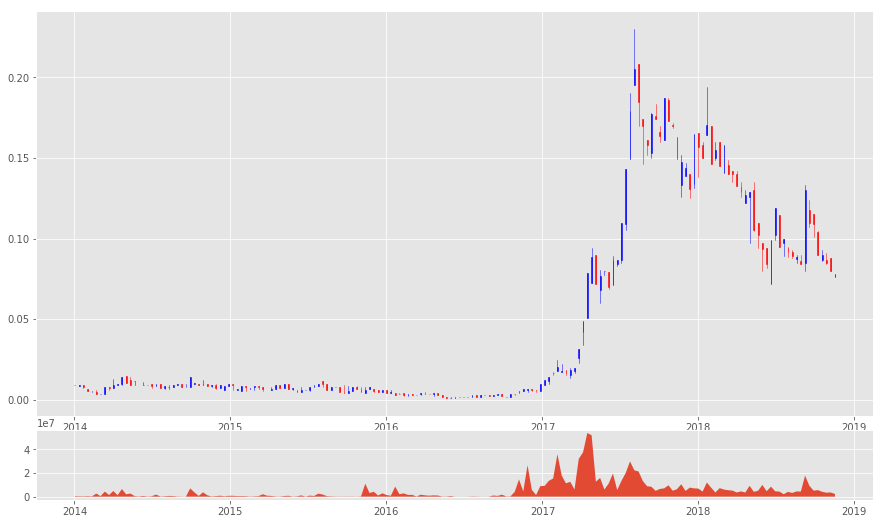

In [64]:
#stock candlestick plot over time
#visualize the open, close, high, low price for stock over time
ax1 = plt.subplot2grid((6,1),(0,0),
                       rowspan=5,
                       colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),
                       rowspan=1,
                       colspan=1,
                       sharex=ax1)
ax1.xaxis_date()


candlestick_ohlc(ax1,df_ohlc.values,
                 width=2,
                 colorup='b')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()


Text(0.5,1,'Trading Volume Plot')

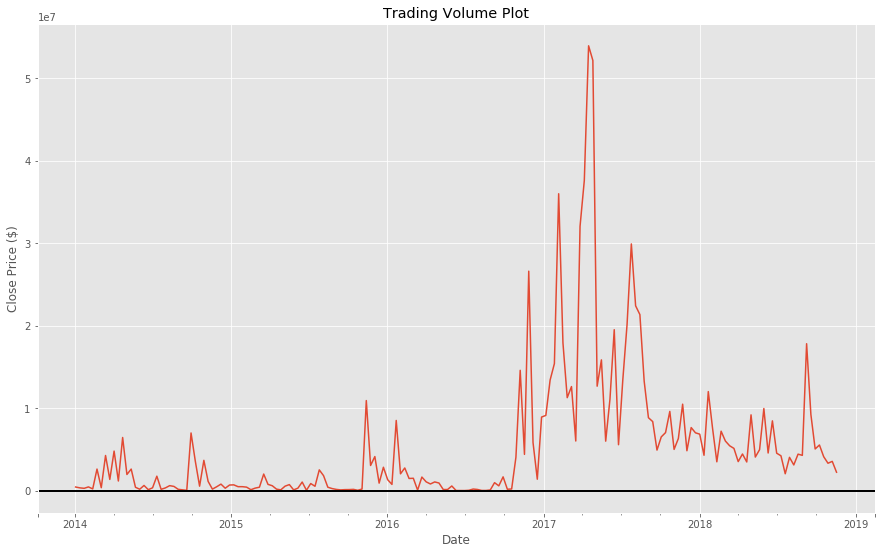

In [65]:
#stock trade volume change over time
df_volume.plot(grid = True).axhline(y = 1, 
                                       color = "black", 
                                       lw = 2)
plt.xlabel('Date')  
plt.ylabel('Close Price ($)')  
plt.title('Trading Volume Plot')